# Visualizing The Gender Gap In College Degrees

In this project we try to visualize the gender gap across college degrees. We will generate line charts to compare across all degree categories.

<a href="https://nces.ed.gov/programs/digest/2013menu_tables.asp">The Department of Education Statistics </a>releases a data set annually containing the percentage of bachelor's degrees granted to women from 1970 to 2012. The data set is broken up into 17 categories of degrees, with each column as a separate category.

Randal Olson, a data scientist at University of Pennsylvania, has cleaned the data set and made it available on his personal website. Here's a preview of the first few rows:

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

women_degrees = pd.read_csv('percent-bachelors-degrees-women-usa.csv')

In [2]:
women_degrees.head()

,Year,Agriculture,Architecture,Art and Performance,Biology,Business,Communications and Journalism,Computer Science,Education,Engineering,English,Foreign Languages,Health Professions,Math and Statistics,Physical Sciences,Psychology,Public Administration,Social Sciences and History
0,1970,4.229798,11.921005,59.7,29.088363,9.064439,35.3,13.6,74.535328,0.8,65.570923,73.8,77.1,38.0,13.8,44.4,68.4,36.8
1,1971,5.452797,12.003106,59.9,29.394403,9.503187,35.5,13.6,74.149204,1.0,64.556485,73.9,75.5,39.0,14.9,46.2,65.5,36.2
2,1972,7.420710,13.214594,60.4,29.810221,10.558962,36.6,14.9,73.554520,1.2,63.664263,74.6,76.9,40.2,14.8,47.6,62.6,36.1
3,1973,9.653602,14.791613,60.2,31.147915,12.804602,38.4,16.4,73.501814,1.6,62.941502,74.9,77.4,40.9,16.5,50.4,64.3,36.4
4,1974,14.074623,17.444688,61.9,32.996183,16.204850,40.5,18.9,73.336811,2.2,62.413412,75.3,77.9,41.8,18.2,52.6,66.1,37.3


In this project we will explore how we can communicate the nuanced narrative of gender gap using effective data visualization. The 6 graphs below visualize the gender gap in STEM fields, which stands for science, technology, engineering, and mathematics. This gap is reported on often <a href="https://www.google.com/search?hl=en&gl=us&tbm=nws&authuser=0&q=gender+gap+stem&oq=gender+gap+stem&gs_l=news">in the news </a>.

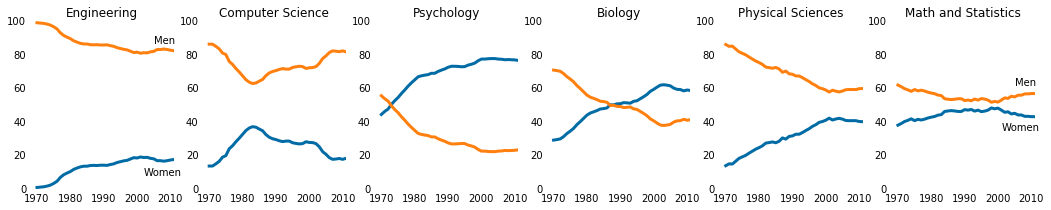

In [6]:
cb_dark_blue = (0/255,107/255,164/255)
cb_orange = (255/255, 128/255, 14/255)
stem_cats = ['Engineering', 'Computer Science', 'Psychology', 'Biology', 'Physical Sciences', 'Math and Statistics']

fig = plt.figure(figsize=(18, 3))

for sp in range(0,6):
    ax = fig.add_subplot(1,6,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[sp]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[sp]], c=cb_orange, label='Men', linewidth=3)
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(stem_cats[sp])
    ax.tick_params(bottom="off", top="off", left="off", right="off")
    
    if sp == 0:
        ax.text(2005, 87, 'Men')
        ax.text(2002, 8, 'Women')
    elif sp == 5:
        ax.text(2005, 62, 'Men')
        ax.text(2001, 35, 'Women')
plt.show()

## Comparing across all degree categories

Let's extend the work and generate line charts not just on the STEM degrees but on all degree categories. So we set up two more categories next to the STEM, these are the liberal arts and the other categories:

All three of these lists are ordered in descending order by the percentage of degrees awarded to women.

In [3]:
stem_cats = ['Psychology', 'Biology', 'Math and Statistics', 'Physical Sciences', 'Computer Science', 'Engineering']
lib_arts_cats = ['Foreign Languages', 'English', 'Communications and Journalism', 'Art and Performance', 'Social Sciences and History']
other_cats = ['Health Professions', 'Public Administration', 'Education', 'Agriculture','Business', 'Architecture']

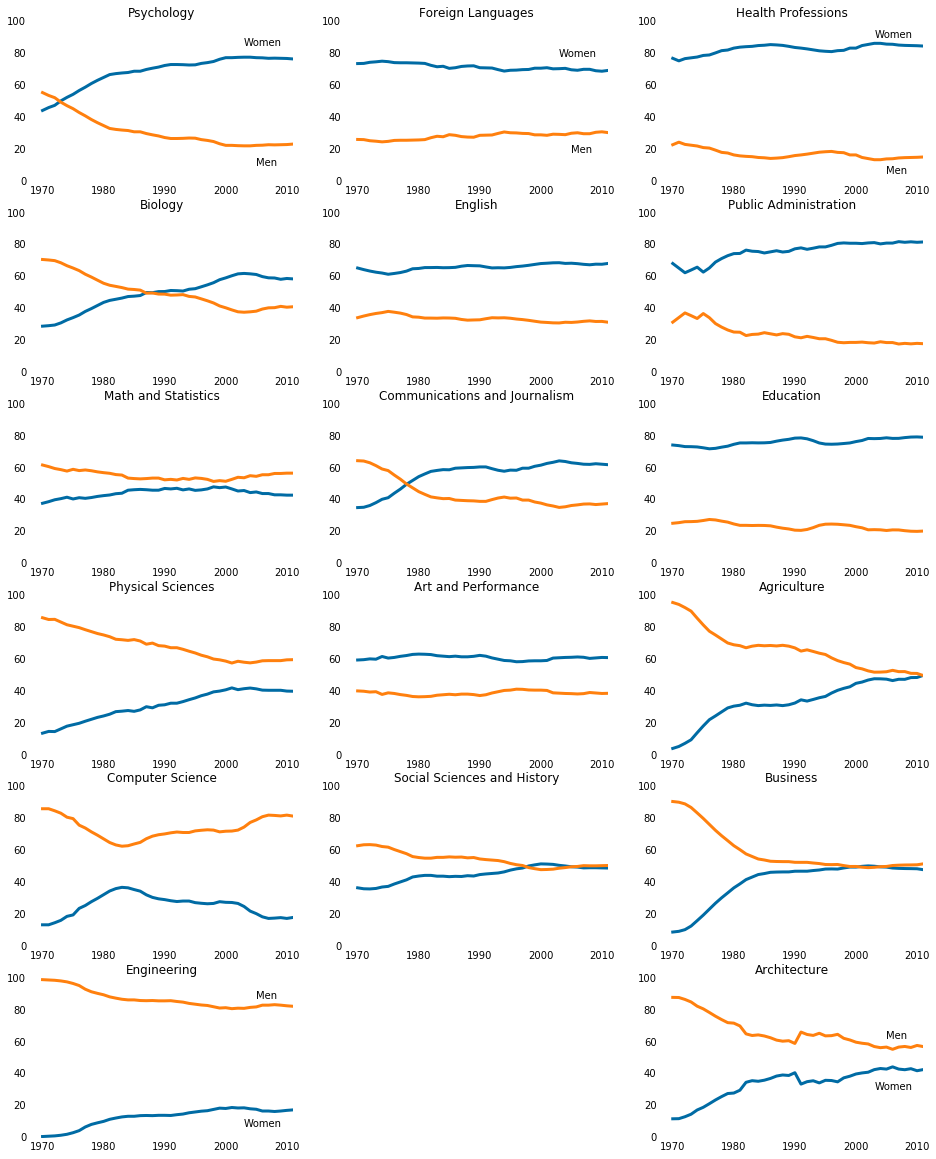

In [5]:
fig = plt.figure(figsize=(16, 20))


# Generate the first column, STEM degrees:
for sp in range(0,18,3):
    cat_index=int(sp/3)
    ax = fig.add_subplot(6,3,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[cat_index]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[cat_index]], c=cb_orange, label='Men', linewidth=3)
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(stem_cats[cat_index])
    ax.tick_params(bottom="off", top="off", left="off", right="off")
    
    #put line annotation:
    if sp/3 == 0:
        ax.text(2003, 85, 'Women')
        ax.text(2005, 10, 'Men')
    elif sp/3 == 5:
        ax.text(2005, 87, 'Men')
        ax.text(2003, 7, 'Women')
        
# Generate the second column, lib_arts degrees:
for sp in range(1,16,3):
    cat_index=int((sp-1)/3)  #we need to start to get the list elements from the 0.elements, and the for loop starts from 1.
    ax = fig.add_subplot(6,3,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[lib_arts_cats[cat_index]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[lib_arts_cats[cat_index]], c=cb_orange, label='Men', linewidth=3)
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(lib_arts_cats[cat_index])
    ax.tick_params(bottom="off", top="off", left="off", right="off")
    
    #put line annotation:
    if cat_index == 0:
        ax.text(2003, 78, 'Women')
        ax.text(2005, 18, 'Men')
        

# Generate the third column, other degrees:
for sp in range(2,20,3): #
    cat_index=int((sp-2)/3)  #we need to start to get the list elements from the 0.elements, and the for loop starts from 2.
    ax = fig.add_subplot(6,3,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[other_cats[cat_index]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[other_cats[cat_index]], c=cb_orange, label='Men', linewidth=3)
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(other_cats[cat_index])
    ax.tick_params(bottom="off", top="off", left="off", right="off")
    
    
    if cat_index == 0:
        ax.text(2003, 90, 'Women')
        ax.text(2005, 5, 'Men')
    elif cat_index == 5:
        ax.text(2005, 62, 'Men')
        ax.text(2003, 30, 'Women')
        
plt.show()



## Improving the charts

#### 1. Hiding x-axis labels:

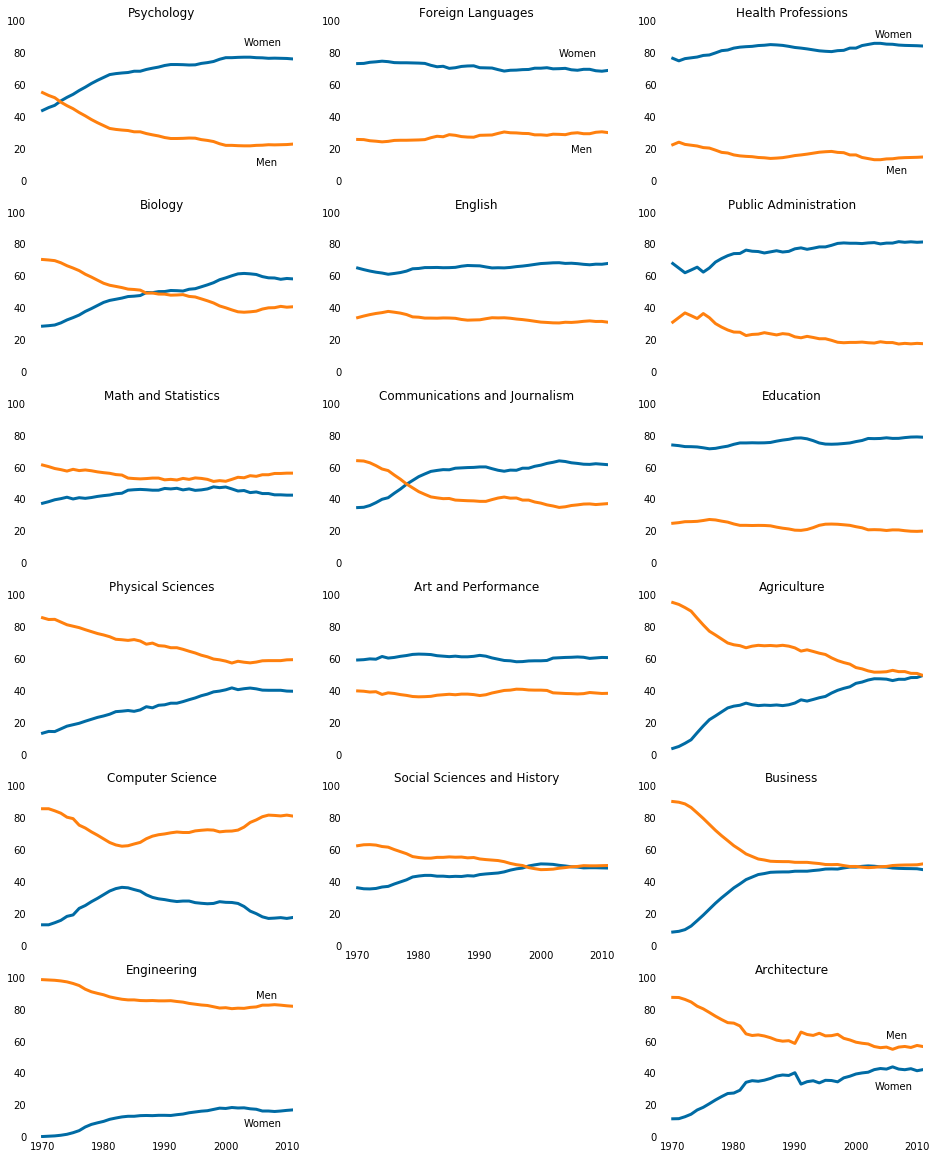

In [8]:
fig = plt.figure(figsize=(16, 20))


# Generate the first column, STEM degrees:
for sp in range(0,18,3):
    cat_index=int(sp/3)
    ax = fig.add_subplot(6,3,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[cat_index]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[cat_index]], c=cb_orange, label='Men', linewidth=3)
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(stem_cats[cat_index])
    ax.tick_params(bottom="off", top="off", left="off", right="off", labelbottom="off") #hide x-axis
    
    #put line annotation:
    if sp/3 == 0:
        ax.text(2003, 85, 'Women')
        ax.text(2005, 10, 'Men')
    elif sp/3 == 5:
        ax.text(2005, 87, 'Men')
        ax.text(2003, 7, 'Women')
        ax.tick_params(labelbottom='on') #turn on x-axis label on the last chart
        
# Generate the second column, lib_arts degrees:
for sp in range(1,16,3):
    cat_index=int((sp-1)/3)  #we need to start to get the list elements from the 0.elements, and the for loop starts from 1.
    ax = fig.add_subplot(6,3,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[lib_arts_cats[cat_index]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[lib_arts_cats[cat_index]], c=cb_orange, label='Men', linewidth=3)
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(lib_arts_cats[cat_index])
    ax.tick_params(bottom="off", top="off", left="off", right="off", labelbottom="off") #hide x-axis
    
    #put line annotation:
    if cat_index == 0:
        ax.text(2003, 78, 'Women')
        ax.text(2005, 18, 'Men')
    elif cat_index == 4:
        ax.tick_params(labelbottom='on') #turn on x-axis label on the last chart
        

# Generate the third column, other degrees:
for sp in range(2,20,3): #
    cat_index=int((sp-2)/3)  #we need to start to get the list elements from the 0.elements, and the for loop starts from 2.
    ax = fig.add_subplot(6,3,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[other_cats[cat_index]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[other_cats[cat_index]], c=cb_orange, label='Men', linewidth=3)
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(other_cats[cat_index])
    ax.tick_params(bottom="off", top="off", left="off", right="off", labelbottom='off') #hide x-axis
    
    
    if cat_index == 0:
        ax.text(2003, 90, 'Women')
        ax.text(2005, 5, 'Men')
    elif cat_index == 5:
        ax.text(2005, 62, 'Men')
        ax.text(2003, 30, 'Women')
        ax.tick_params(labelbottom='on') #turn on x-axis label on the last chart
        
plt.show()

#### 2. Improving y-axis

 Currently, all seventeen plots have six y-axis labels and even though they are consistent across the plots, they still add to the visual clutter. By keeping just the starting and ending labels (0 and 100), we can keep some of the benefits of having the y-axis labels to begin with.

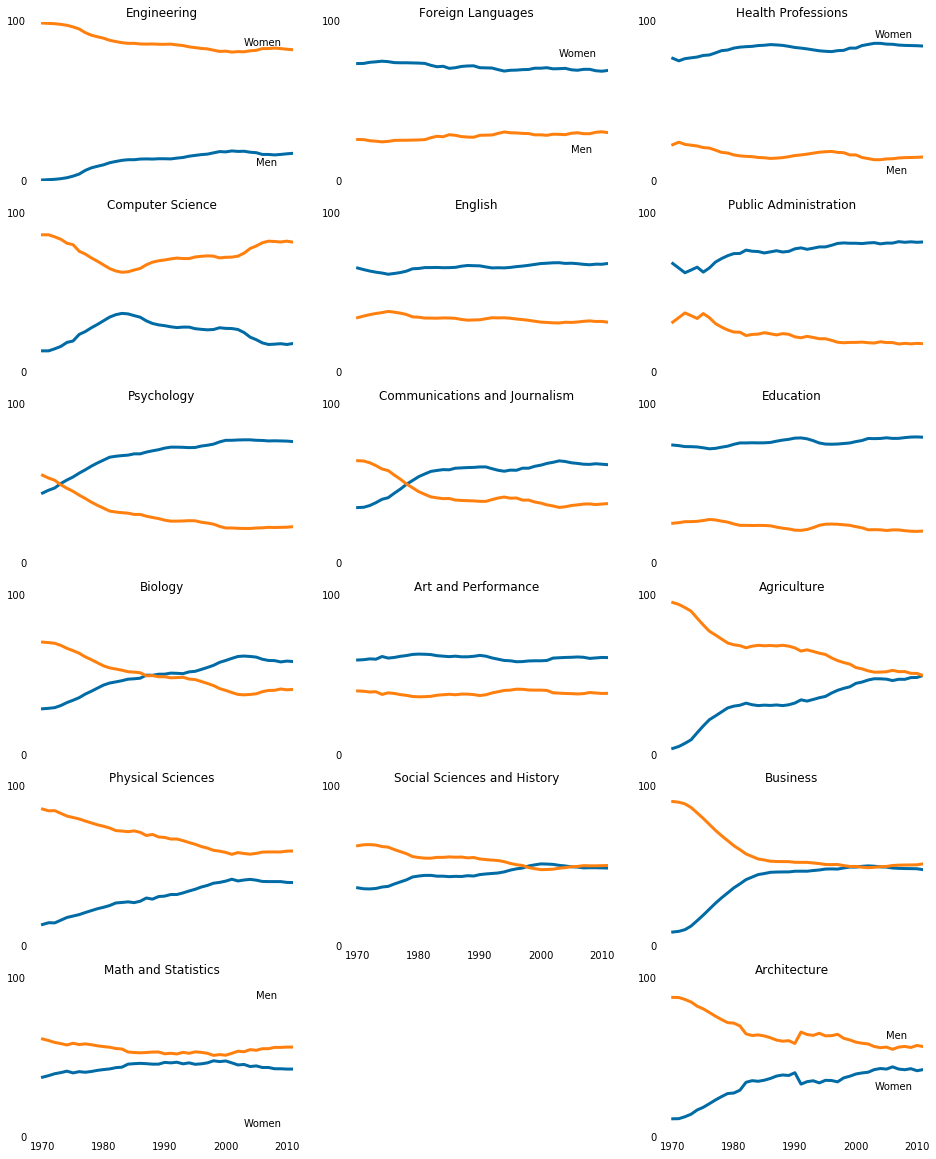

In [7]:
fig = plt.figure(figsize=(16, 20))


# Generate the first column, STEM degrees:
for sp in range(0,18,3):
    cat_index=int(sp/3)
    ax = fig.add_subplot(6,3,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[cat_index]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[cat_index]], c=cb_orange, label='Men', linewidth=3)
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_yticks([0,100]) # Enable just the y-axis labels at 0 and 100.
    ax.set_title(stem_cats[cat_index])
    ax.tick_params(bottom="off", top="off", left="off", right="off", labelbottom="off") #hide x-axis
    
    #put line annotation:
    if sp/3 == 0:
        ax.text(2003, 85, 'Women')
        ax.text(2005, 10, 'Men')
    elif sp/3 == 5:
        ax.text(2005, 87, 'Men')
        ax.text(2003, 7, 'Women')
        ax.tick_params(labelbottom='on') #turn on x-axis label on the last chart
        
# Generate the second column, lib_arts degrees:
for sp in range(1,16,3):
    cat_index=int((sp-1)/3)  #we need to start to get the list elements from the 0.elements, and the for loop starts from 1.
    ax = fig.add_subplot(6,3,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[lib_arts_cats[cat_index]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[lib_arts_cats[cat_index]], c=cb_orange, label='Men', linewidth=3)
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_yticks([0,100]) # Enable just the y-axis labels at 0 and 100.
    ax.set_title(lib_arts_cats[cat_index])
    ax.tick_params(bottom="off", top="off", left="off", right="off", labelbottom="off") #hide x-axis
    
    #put line annotation:
    if cat_index == 0:
        ax.text(2003, 78, 'Women')
        ax.text(2005, 18, 'Men')
    elif cat_index == 4:
        ax.tick_params(labelbottom='on') #turn on x-axis label on the last chart
        

# Generate the third column, other degrees:
for sp in range(2,20,3): #
    cat_index=int((sp-2)/3)  #we need to start to get the list elements from the 0.elements, and the for loop starts from 2.
    ax = fig.add_subplot(6,3,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[other_cats[cat_index]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[other_cats[cat_index]], c=cb_orange, label='Men', linewidth=3)
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_yticks([0,100]) # Enable just the y-axis labels at 0 and 100.
    ax.set_title(other_cats[cat_index])
    ax.tick_params(bottom="off", top="off", left="off", right="off", labelbottom='off') #hide x-axis
    
    
    if cat_index == 0:
        ax.text(2003, 90, 'Women')
        ax.text(2005, 5, 'Men')
    elif cat_index == 5:
        ax.text(2005, 62, 'Men')
        ax.text(2003, 30, 'Women')
        ax.tick_params(labelbottom='on') #turn on x-axis label on the last chart
        
plt.show()

While removing most of the y-axis labels definitely reduced clutter, it also made it hard to understand which degrees have close to 50-50 gender breakdown. While keeping all of the y-axis labels would have made it easier, we can actually do one better and use a horizontal line across all of the line charts where the y-axis label 50 would have been.

We can generate a horizontal line across an entire subplot using the Axes.axhline() method.

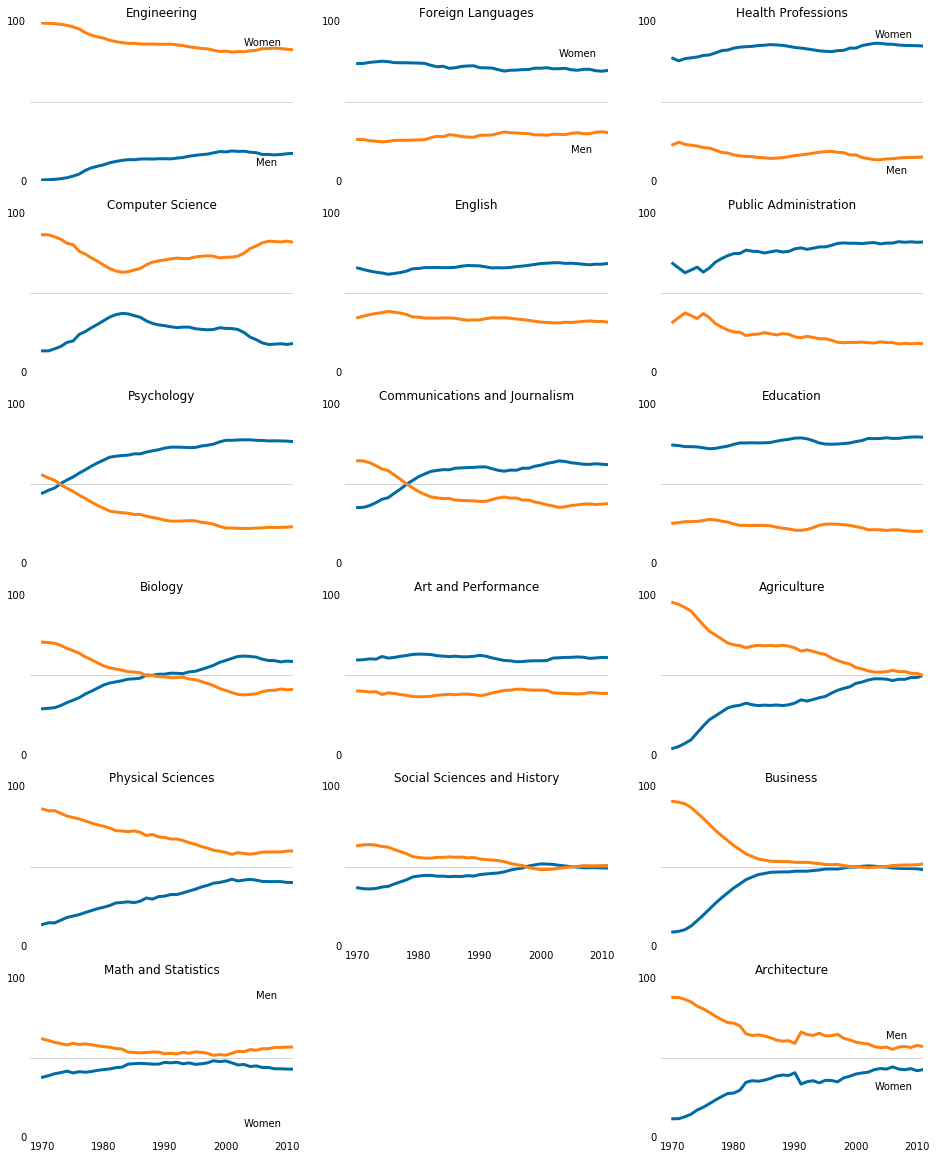

In [11]:
fig = plt.figure(figsize=(16, 20))


# Generate the first column, STEM degrees:
for sp in range(0,18,3):
    cat_index=int(sp/3)
    ax = fig.add_subplot(6,3,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[cat_index]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[cat_index]], c=cb_orange, label='Men', linewidth=3)
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_yticks([0,100]) # Enable just the y-axis labels at 0 and 100.
    ax.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.5) # Generate a horizontal line at y=50, with 0.5 transparency
    ax.set_title(stem_cats[cat_index])
    ax.tick_params(bottom="off", top="off", left="off", right="off", labelbottom="off") #hide x-axis
    
    #put line annotation:
    if sp/3 == 0:
        ax.text(2003, 85, 'Women')
        ax.text(2005, 10, 'Men')
    elif sp/3 == 5:
        ax.text(2005, 87, 'Men')
        ax.text(2003, 7, 'Women')
        ax.tick_params(labelbottom='on') #turn on x-axis label on the last chart
        
# Generate the second column, lib_arts degrees:
for sp in range(1,16,3):
    cat_index=int((sp-1)/3)  #we need to start to get the list elements from the 0.elements, and the for loop starts from 1.
    ax = fig.add_subplot(6,3,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[lib_arts_cats[cat_index]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[lib_arts_cats[cat_index]], c=cb_orange, label='Men', linewidth=3)
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_yticks([0,100]) # Enable just the y-axis labels at 0 and 100.
    ax.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.5)  # Generate a horizontal line at y=50, with 0.5 transparency
    ax.set_title(lib_arts_cats[cat_index])
    ax.tick_params(bottom="off", top="off", left="off", right="off", labelbottom="off") #hide x-axis
    
    #put line annotation:
    if cat_index == 0:
        ax.text(2003, 78, 'Women')
        ax.text(2005, 18, 'Men')
    elif cat_index == 4:
        ax.tick_params(labelbottom='on') #turn on x-axis label on the last chart
        

# Generate the third column, other degrees:
for sp in range(2,20,3): #
    cat_index=int((sp-2)/3)  #we need to start to get the list elements from the 0.elements, and the for loop starts from 2.
    ax = fig.add_subplot(6,3,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[other_cats[cat_index]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[other_cats[cat_index]], c=cb_orange, label='Men', linewidth=3)
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_yticks([0,100]) # Enable just the y-axis labels at 0 and 100.
    ax.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.5) # Generate a horizontal line at y=50, with 0.5 transparency
    ax.set_title(other_cats[cat_index])
    ax.tick_params(bottom="off", top="off", left="off", right="off", labelbottom='off') #hide x-axis
    
    
    if cat_index == 0:
        ax.text(2003, 90, 'Women')
        ax.text(2005, 5, 'Men')
    elif cat_index == 5:
        ax.text(2005, 62, 'Men')
        ax.text(2003, 30, 'Women')
        ax.tick_params(labelbottom='on') #turn on x-axis label on the last chart
        
# Export file before calling pyplot.show()
plt.savefig('gender_degrees.png')
plt.show()